In [1]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [ ]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-25 10:56:36--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   159MB/s    in 0.6s    

2024-03-25 10:56:37 (159 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...


In [3]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-aecc7rwq
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-aecc7rwq
  Resolved https://github.com/ersilia-os/ersilia.git to commit 7d3908e1859eb5e518eb57109e2b66fd26b4798b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 97 kB 3.2 MB/s 
     |████████████████████████████████| 4.3 MB 40.6 MB/s 
     |████████████████████████████████| 139 kB 50.6 MB/s 
     |████████████████████████████████| 421 kB 51.6 MB/s 
     |████████████████████████████████| 58 kB 3.2 MB/s 
     |████████████████████████████████| 62 kB 916 kB/s 
     |████████████████████████████████| 148 kB 47.4 MB/s 
     |████████████████████████████████| 78 kB 5.1 MB/s 
     |████████████████████████████████| 670 kB 49.8 MB/s 
     |████████████████████████████████| 9.9 MB 49.4 MB/s 
     |████████

In [4]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [5]:
import sys

In [6]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [7]:
## Mount google drive
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
# specifying my input folder

input_folder = "/content/drive/MyDrive/Ersilia"

In [10]:
# specifying my output folder

output_folder = "/content/drive/MyDrive/Ersilia"

In [11]:
model_name = "eos6oli"

# Fetching the Model

In [12]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-bj7m9ps8
Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.3.11  |       h06

# Serving the Model

In [13]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:51765
   PID: 6033
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


# Checking for data leakage

Reading in the training dataset used by authors

In [15]:
# specifying the name of my input csv file

input_filename = "aqsol"

In [14]:
# specify the SMILES column name
smiles_column = "smiles"

In [20]:
# Extracting SMILES to a list
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df1 = pd.read_csv(path)
training_smiles = df1[smi_col].tolist()

print("The training dataset contains" + " " + str(len(training_smiles)) + " " + "SMILES")

The training dataset contains 9982 SMILES


# Reading in external dataset with sufficient experimental results

In [21]:
# specify the name of my input csv file

input_filename = "Supplementary Table S1"

In [22]:
# specify the SMILES column name
smiles_column = "SMILES"

In [30]:
#convert smiles column to a list
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path, encoding='latin1')
external_smiles = df[smi_col].tolist()

print("The external dataset contains" + " " + str(len(external_smiles)) + " " + "SMILES")

The external dataset contains 9955 SMILES


In [32]:
df.tail(20)

,Compound ID,InChIKey,SMILES,logS,logP,MW
9935,C1662,LESVOLZBIFDZGS-SSDOTTSWSA-N,CNC(=O)[C@H](SCCSP(=O)(OC)OC)C,1.140000,2.3791,287.3370
9936,C1663,RWRDLPDLKQPQOW-UHFFFAOYSA-N,C1CCCN1,1.150000,0.6986,71.1210
9937,C9943,OGGXGZAMXPVRFZ-UHFFFAOYSA-N,C[As](=O)(O)C,1.161157,0.1110,137.9970
9938,C1664,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.220000,0.0909,60.0520
9939,C1665,HDZGCSFEDULWCS-UHFFFAOYSA-N,CNN,1.340000,0.1707,46.0717
9940,C1666,OKKJLVBELUTLKV-UHFFFAOYSA-N,CO,1.570000,-0.3915,32.0419
9941,C1667,DLFVBJFMPXGRIB-UHFFFAOYSA-N,CC(=O)N,1.580000,0.1919,59.0672
9942,C1710,RNFNDJAIBTYOQL-UHFFFAOYSA-N,OC(C(Cl)(Cl)Cl)O\t,1.700000,0.6673,165.4030
9943,NaN,NaN,NaN,NaN,NaN,NaN
9944,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Dropping Nan in df
df.dropna(inplace=True)
df.tail(10)

,Compound ID,InChIKey,SMILES,logS,logP,MW
9933,C9941,KFIGICHILYTCJF-UHFFFAOYSA-N,CNCCN,1.130024,0.2557,74.1249
9934,C9942,RSFOTOSOKJMMCB-UHFFFAOYSA-N,CN(C=O)N,1.130281,0.2845,74.0818
9935,C1662,LESVOLZBIFDZGS-SSDOTTSWSA-N,CNC(=O)[C@H](SCCSP(=O)(OC)OC)C,1.140000,2.3791,287.3370
9936,C1663,RWRDLPDLKQPQOW-UHFFFAOYSA-N,C1CCCN1,1.150000,0.6986,71.1210
9937,C9943,OGGXGZAMXPVRFZ-UHFFFAOYSA-N,C[As](=O)(O)C,1.161157,0.1110,137.9970
9938,C1664,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.220000,0.0909,60.0520
9939,C1665,HDZGCSFEDULWCS-UHFFFAOYSA-N,CNN,1.340000,0.1707,46.0717
9940,C1666,OKKJLVBELUTLKV-UHFFFAOYSA-N,CO,1.570000,-0.3915,32.0419
9941,C1667,DLFVBJFMPXGRIB-UHFFFAOYSA-N,CC(=O)N,1.580000,0.1919,59.0672
9942,C1710,RNFNDJAIBTYOQL-UHFFFAOYSA-N,OC(C(Cl)(Cl)Cl)O\t,1.700000,0.6673,165.4030


# Comparing the training and external dataset to check for data leakage

In [35]:
def check_for_leaks(external_smiles, training_smiles):
    leaks = []
    for smile in external_smiles:
        if smile in training_smiles:
            print(f"The molecule {smile} is a leak.")
            leaks.append(smile)
    return leaks

leak_items = check_for_leaks(external_smiles, training_smiles)
total_leaks = len(leak_items)
print(f"Total number of leaks found: {total_leaks}")

if not leak_items:
    print("No leaks found.")

The molecule CCCCCCCCCCCCCCC is a leak.
The molecule CCCCCCCCCCCCCCCC is a leak.
The molecule CCCCCCCCCCCCCCCCCCO is a leak.
The molecule CCCCCCCCCCCCCCCCCCCCCCCCCC is a leak.
The molecule CCCCCCCCCCCCCCCCCCCC is a leak.
The molecule CCCCCCCCCCCCCC is a leak.
The molecule CCCCCCCCCCCCC is a leak.
The molecule CCCCCCCCCCC is a leak.
The molecule CCCCCCCCCCCCCCCCO is a leak.
The molecule CCCCCCCCCCCCCC(=O)OC(C)C is a leak.
The molecule CCCCCCCCOCCCCCCCC is a leak.
The molecule [Hg] is a leak.
The molecule CCCCCCCCCCCCCCCCN(C)C is a leak.
The molecule CCCCCCCCCCCCCCCO is a leak.
The molecule CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC is a leak.
The molecule CCCCCC1CCCC1 is a leak.
The molecule CCCCCCCCCCCCCCO is a leak.
The molecule CCCCCCCCC is a leak.
The molecule CCCCCCCCC=C is a leak.
The molecule CCCCOC(=O)c1ccc(cc1)C(=O)OCCCC is a leak.
The molecule CCCCCCCC is a leak.
The molecule CCCCCCc1ccccc1 is a leak.
The molecule CCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCC is a leak.
The molecule CCCCCC(C)C i

# Deleting the Leaks

In [37]:
# Check if 'smiles' values in external_df is in the list of leak_items
mask = df['SMILES'].isin(leak_items)

# Invert the mask to keep rows where the 'smiles' values is not a leak
No_Leaks_df = df[~mask]

In [38]:
No_Leaks_df

,Compound ID,InChIKey,SMILES,logS,logP,MW
0,C1711,ACTIUHUUMQJHFO-UPTCCGCDSA-N,COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...,-18.217693,17.8539,863.3440
1,C1712,CQISYTXUORWJSX-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...,-17.468457,14.2326,641.0650
2,C1713,UXPYIAWFQKSHNV-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC,-16.259392,11.8156,566.9390
3,C1714,BDIWFCKBPZPBQT-UHFFFAOYSA-N,CCCC[Sn](S[Sn](CCCC)(CCCC)CCCC)(CCCC)CCCC,-15.676287,10.4112,612.1530
4,C1715,RNPXCFINMKSQPQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O,-15.205120,12.0826,546.8460
...,...,...,...,...,...,...
9936,C1663,RWRDLPDLKQPQOW-UHFFFAOYSA-N,C1CCCN1,1.150000,0.6986,71.1210
9937,C9943,OGGXGZAMXPVRFZ-UHFFFAOYSA-N,C[As](=O)(O)C,1.161157,0.1110,137.9970
9938,C1664,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.220000,0.0909,60.0520
9941,C1667,DLFVBJFMPXGRIB-UHFFFAOYSA-N,CC(=O)N,1.580000,0.1919,59.0672


# Data Preprocessing: Checking if SMILES are standardized

In [39]:
import rdkit
from rdkit import Chem

def is_smiles(smiles):
  try:
    mol=Chem.MolFromSmiles(smiles)
    if mol is None:
      return False
    return True
  except:
    return False

In [43]:
for i in No_Leaks_df['SMILES']:
  if is_smiles(i):
    print("Valid SMILES")
  else:
    print("Not a valid SMILES")

Streaming output truncated to the last 5000 lines.
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES


In [44]:
No_Leaks_df.to_csv('/content/drive/MyDrive/Ersilia/NoLeaks_data.csv', index=False)

# Reading in the No_leaks Dataset from Drive

In [45]:
# specify the name of my input csv file

input_filename = "NoLeaks_data"

In [46]:
# specify the SMILES column name
smiles_column = "SMILES"

In [47]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 9575 SMILES


In [49]:
df.head()

,Compound ID,InChIKey,SMILES,logS,logP,MW
0,C1711,ACTIUHUUMQJHFO-UPTCCGCDSA-N,COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...,-18.217693,17.8539,863.344
1,C1712,CQISYTXUORWJSX-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...,-17.468457,14.2326,641.065
2,C1713,UXPYIAWFQKSHNV-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC,-16.259392,11.8156,566.939
3,C1714,BDIWFCKBPZPBQT-UHFFFAOYSA-N,CCCC[Sn](S[Sn](CCCC)(CCCC)CCCC)(CCCC)CCCC,-15.676287,10.4112,612.153
4,C1715,RNPXCFINMKSQPQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O,-15.205120,12.0826,546.846


In [50]:
 #Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 528.59 seconds


In [51]:
# Check the results

print(output.head())

                           key  \
0  ACTIUHUUMQJHFO-UPTCCGCDSA-N   
1  CQISYTXUORWJSX-UHFFFAOYSA-N   
2  UXPYIAWFQKSHNV-UHFFFAOYSA-N   
3  BDIWFCKBPZPBQT-UHFFFAOYSA-N   
4  RNPXCFINMKSQPQ-UHFFFAOYSA-N   

                                               input  solubility  
0  COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...      -8.193  
1  CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...      -6.842  
2     CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC      -7.846  
3          CCCC[Sn](S[Sn](CCCC)(CCCC)CCCC)(CCCC)CCCC      -7.488  
4         CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O      -7.599  


In [53]:
#Save the results in Google Drive

output.to_csv("/content/drive/MyDrive/Ersilia/ErsiliaValidation.csv", index=False)

In [54]:
ErsiliaEvaluation=pd.read_csv("/content/drive/MyDrive/Ersilia/ErsiliaValidation.csv")
ErsiliaEvaluation.head()

,key,input,solubility
0,ACTIUHUUMQJHFO-UPTCCGCDSA-N,COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...,-8.193
1,CQISYTXUORWJSX-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...,-6.842
2,UXPYIAWFQKSHNV-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC,-7.846
3,BDIWFCKBPZPBQT-UHFFFAOYSA-N,CCCC[Sn](S[Sn](CCCC)(CCCC)CCCC)(CCCC)CCCC,-7.488
4,RNPXCFINMKSQPQ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O,-7.599


In [58]:
#matching outputs with smiles and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(ErsiliaEvaluation, df[['SMILES', 'logS']], how='left', left_on='input', right_on='SMILES')

# Renaming and dropping redundant columns
merged_predictions = merged_predictions.rename(columns={'logS': 'experimental_solubility'})
merged_predictions = merged_predictions.rename(columns={'solubility': 'predicted_solubility'})
merged_predictions = merged_predictions.drop(columns='SMILES', axis=1)

# Displaying the result
print(merged_predictions)

                              key  \
0     ACTIUHUUMQJHFO-UPTCCGCDSA-N   
1     CQISYTXUORWJSX-UHFFFAOYSA-N   
2     UXPYIAWFQKSHNV-UHFFFAOYSA-N   
3     BDIWFCKBPZPBQT-UHFFFAOYSA-N   
4     RNPXCFINMKSQPQ-UHFFFAOYSA-N   
...                           ...   
9570  RWRDLPDLKQPQOW-UHFFFAOYSA-N   
9571  OGGXGZAMXPVRFZ-UHFFFAOYSA-N   
9572  QTBSBXVTEAMEQO-UHFFFAOYSA-N   
9573  DLFVBJFMPXGRIB-UHFFFAOYSA-N   
9574  RNFNDJAIBTYOQL-UHFFFAOYSA-N   

                                                  input  predicted_solubility  \
0     COC1=C(OC)C(=O)C(=C(C1=O)C/C=C(/CC/C=C(/CC/C=C...                -8.193   
1     CCCCCCCCCCCCCCCCCC(=O)Nc1ccc(cc1)NC(=O)CCCCCCC...                -6.842   
2        CCCCCCCCCCCCCCCC(=O)OCCCCOC(=O)CCCCCCCCCCCCCCC                -7.846   
3             CCCC[Sn](S[Sn](CCCC)(CCCC)CCCC)(CCCC)CCCC                -7.488   
4            CCCCCCCCCCCCCCCCOP(=O)(OCCCCCCCCCCCCCCCC)O                -7.599   
...                                                 ...              

In [59]:
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_ErsiliaValidation.csv", index=False)

In [60]:
from sklearn.metrics import r2_score

r2 = r2_score(merged_predictions['experimental_solubility'], merged_predictions['predicted_solubility'])
print(f'R-squared (R2): {r2:.2f}')

R-squared (R2): 0.51


# PCA of Morgan Fingerprints

In [61]:
No_Leaks_df=pd.read_csv("/content/drive/MyDrive/Ersilia/NoLeaks_data.csv")

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  9982 non-null   object 
 1   y       9982 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.1+ KB


In [63]:
No_Leaks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Compound ID  9575 non-null   object 
 1   InChIKey     9575 non-null   object 
 2   SMILES       9575 non-null   object 
 3   logS         9575 non-null   float64
 4   logP         9575 non-null   float64
 5   MW           9575 non-null   float64
dtypes: float64(3), object(3)
memory usage: 449.0+ KB


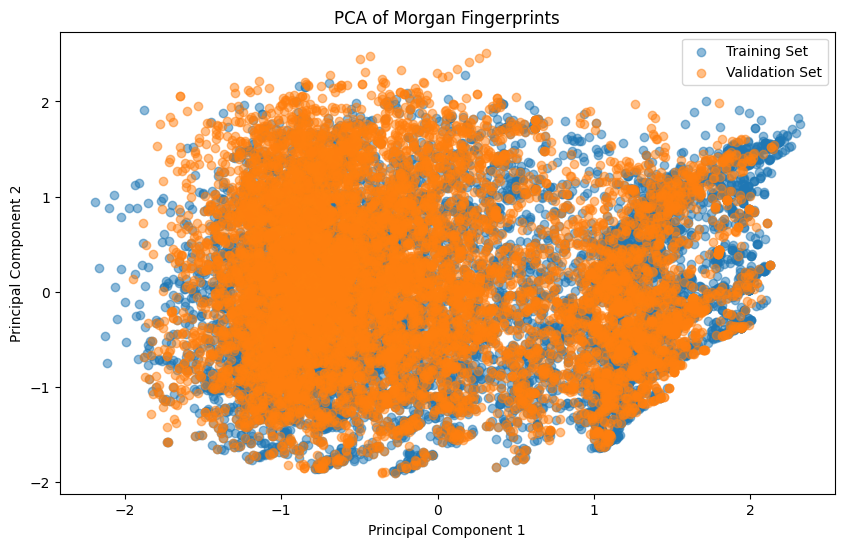

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import ConvertToNumpyArray

# Function to generate Morgan fingerprints for a list of molecules
def generate_morgan_fingerprints(smiles_list, radius=2, n_bits=2048):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    fingerprints = []
    for mol in mols:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        arr = np.zeros((1,), dtype=int)  # Corrected here
        ConvertToNumpyArray(fp, arr)
        fingerprints.append(arr)

    return np.array(fingerprints)



# Convert molecules to Morgan fingerprints
training_fingerprints = generate_morgan_fingerprints(df1['smiles'])
validation_fingerprints = generate_morgan_fingerprints(No_Leaks_df['SMILES'])


# Concatenate fingerprints from both sets
all_fingerprints = np.concatenate((training_fingerprints, validation_fingerprints))

# Apply PCA
pca = PCA(n_components=2)
pca.fit(all_fingerprints)
transformed_training = pca.transform(training_fingerprints)
transformed_validation = pca.transform(validation_fingerprints)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(transformed_training[:, 0], transformed_training[:, 1], label='Training Set', alpha=0.5)
plt.scatter(transformed_validation[:, 0], transformed_validation[:, 1], label='Validation Set', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Morgan Fingerprints')
plt.legend()

plt.savefig('/content/drive/MyDrive/Ersilia/PCAMorganFingerprints_plot.png')
plt.show()